## Transformations, Mapping and Data Representations

Roll number: 2021101068

### Instructions
 * Fill in the roll-number in the cell above.
 * Code must be written in Python in Jupyter Notebooks. We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment.
 * All the code and result files should be uploaded in the github classroom.
 * For this assignment, you will be using Open3D and AI2Thor extensively. Refer to [Open3D](http://www.open3d.org/docs/release/) and [AI2Thor](https://github.com/allenai/ai2thor) documentation.
 *  Most of the questions require you to **code your own functions** unless there is a need to call in the abilities of the mentioned libraries, such as Visualisation from Open3D. Make sure your code is modular since you will be reusing them for future assignments. All the functions related to transformation matrices, quaternions, and 3D projection are expected to be coded by you.
 *  All the representations are expected to be in a right-hand coordinate system.
<!--  * Answer to the descriptive questions should be answered in your own words. Copy-paste answers will lead to penalty. -->
 * You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.
 * All the visualization should be done inside the notebook unless specified otherwise.
 * Plagiarism will lead to heavy penalty.
 * Commit this notebook in the repo and any other results files under the result folder in the GitHub Classroom repo. 
 * Commits past the deadline will not be considered.

In [1]:
# List the imports here
import numpy as np
from scipy.optimize import fsolve
import open3d as o3d
import time
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### SECTION 1: Transformations and representations

#### 1.1 Euler angles

a. Write a function that returns a rotation matrix given the angles (𝛼, 𝛽, 𝛾) = (π/6, 7π/18, 2π/9) in radians (X-Y-Z). Do not use inbuilt functions.

b. Solve for angles using fsolve from scipy for three initializations of your choice and compare.
$$M(\alpha , \beta ,\gamma)=\left[\begin{array}{rrr}0.72907076 & -0.56745855 & 0.38268343 \\0.64785386 & 0.39180184 & -0.65328148 \\
    0.22077409 & 0.72421137 & 0.65328148\end{array}\right] 
$$

c. Show an example where a Gimbal lock occurs and visualize the Gimbal lock on the given point cloud, data/toothless.ply. You have to show the above by animation (rotation along each axis one by one).

Hint: Use Open3D's non-blocking visualization and discretize the rotation to simulate the animation. For example, if you want to rotate by 20° around a particular axis, do so in increments of 5° 4 times to make it look like an animation.

In [2]:
##############################################################################
# DONE: Do tasks described in 1.1 (a)
##############################################################################

def rotation_matrix(alpha, beta, gamma):
    R_x = np.array([[1, 0, 0], [0, np.cos(alpha), -np.sin(alpha)], [0, np.sin(alpha), np.cos(alpha)]])
    R_y = np.array([[np.cos(beta), 0, np.sin(beta)], [0, 1, 0], [-np.sin(beta), 0, np.cos(beta)]])
    R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0], [np.sin(gamma), np.cos(gamma), 0], [0, 0, 1]])
    rotation_matrix = R_z @ R_y @ R_x
    return rotation_matrix

alpha = np.pi / 6
beta = 7 * np.pi / 18
gamma = 2 * np.pi / 9

rotation_matrix_result = rotation_matrix(alpha, beta, gamma)
print(rotation_matrix_result)

##############################################################################
# END OF YOUR CODE
##############################################################################

[[ 0.26200263 -0.19674724  0.944799  ]
 [ 0.21984631  0.96542533  0.14007684]
 [-0.93969262  0.17101007  0.29619813]]


In [3]:
##############################################################################
# TODO: Do tasks described in 1.1 (b)
##############################################################################

# Given rotation matrix
M = np.array([[0.72907076, -0.56745855, 0.38268343],
              [0.64785386, 0.39180184, -0.65328148],
              [0.22077409, 0.72421137, 0.65328148]])

# Function to calculate residuals
def residualsfunc(angles):
    alpha, beta, gamma, i1, i2, i3, i4, i5, i6 = angles
    # print(alpha, beta, gamma)
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(alpha), -np.sin(alpha)],
                    [0, np.sin(alpha), np.cos(alpha)]])
    R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                    [0, 1, 0],
                    [-np.sin(beta), 0, np.cos(beta)]])
    R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                    [np.sin(gamma), np.cos(gamma), 0],
                    [0, 0, 1]])
    calculated_matrix = R_z @ R_y @ R_x
    # print(calculated_matrix)
    return (calculated_matrix - M).flatten()

# Initial guesses for Euler angles (in radians)
initial_guesses = [(0.5, 0.5, 0.5,0,0,0,0,0,0),  # Example initialization 1
                   (1.0, -0.5, 0.8,0,0,0,0,0,0),  # Example initialization 2
                   (-0.3, 0.7, -1.0,0,0,0,0,0,0)]  # Example initialization 3

solutions = []

for initial_guess in initial_guesses:
    initial_guess = np.array(initial_guess)
    angles_solution = fsolve(residualsfunc, initial_guess)
    solutions.append(angles_solution)
    # print(angles_solution)
    print(rotation_matrix(angles_solution[0], angles_solution[1], angles_solution[2]))
    print()


##############################################################################
# END OF YOUR CODE
##############################################################################

[[ 0.72907076 -0.56745855  0.38268343]
 [ 0.64785386  0.39180184 -0.65328148]
 [ 0.22077409  0.72421137  0.65328148]]

[[ 0.72907076 -0.56745855  0.38268343]
 [ 0.64785386  0.39180184 -0.65328148]
 [ 0.22077409  0.72421137  0.65328148]]

[[ 0.72907076 -0.56745855  0.38268343]
 [ 0.64785386  0.39180184 -0.65328148]
 [ 0.22077409  0.72421137  0.65328148]]



/home/swayam/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [4]:
##############################################################################
# TODO: Do tasks described in 1.1 (c)
##############################################################################

# Load the point cloud data
point_cloud = o3d.io.read_point_cloud("data/toothless.ply")

# Create a visualization window
vis = o3d.visualization.Visualizer()
vis.create_window()

# Add the point cloud to the visualization
vis.add_geometry(point_cloud)

# Function to update the visualization with a rotation
def update_rotation(rotation_matrix):
    transformed_point_cloud = point_cloud.rotate(rotation_matrix, center=(0, 0, 0))
    vis.update_geometry(transformed_point_cloud)
    vis.poll_events()
    vis.update_renderer()

# Define rotation angles
x_rotation = 30  # Rotate about the x-axis by 30 degrees
y_rotation = 90  # Rotate about the y-axis by 90 degrees
z_rotation = 55  # Rotate about the z-axis by 55 degrees

# Convert angles to radians
x_rotation = np.radians(x_rotation)
y_rotation = np.radians(y_rotation)
z_rotation = np.radians(z_rotation)

# Define the number of steps for each rotation
num_steps = 4
x_step = x_rotation / num_steps
y_step = y_rotation / num_steps
z_step = z_rotation / num_steps

# # Perform the animation
# for _ in range(num_steps):

for _ in range(int(num_steps)):
    rotation_matrix_res = rotation_matrix(x_step,0,0)
    # rotation_matrix_x = np.array([[1, 0, 0], [0, np.cos(x_step), -np.sin(x_step)], [0, np.sin(x_step), np.cos(x_step)]])
    update_rotation(rotation_matrix_res)
    time.sleep(0.2) 

for _ in range(int(num_steps)):
    rotation_matrix_res = rotation_matrix(0,y_step,0)
    # rotation_matrix_y = np.array([[np.cos(y_step), 0, np.sin(y_step)], [0, 1, 0], [-np.sin(y_step), 0, np.cos(y_step)]])
    update_rotation(rotation_matrix_res)
    time.sleep(0.2) 

for _ in range(int(num_steps)):
    rotation_matrix_res = rotation_matrix(0,0,z_step)
    # rotation_matrix_z = np.array([[np.cos(z_step), -np.sin(z_step), 0], [np.sin(z_step), np.cos(z_step), 0], [0, 0, 1]])
    update_rotation(rotation_matrix_res)
    time.sleep(0.2) 

# Keep the visualization window open
vis.run()
vis.destroy_window()
##############################################################################
# END OF YOUR CODE
##############################################################################

#### 1.2: Quaternions


a. Convert a rotation matrix to quaternion and vice versa. Do not use inbuilt libraries for this question.

b. Perform matrix multiplication of two 3×3 rotation matrices and perform the same transformation in the quaternion space. Verify if the final transformation obtained in both cases is the same.

c. Try to interpolate any given model between two rotation matrices and visualize!

In [32]:
##############################################################################
# TODO: Do tasks described in 1.2 (a)
##############################################################################

# Given rotation matrix
M = np.array([[0.72907076, -0.56745855, 0.38268343],
              [0.64785386, 0.39180184, -0.65328148],
              [0.22077409, 0.72421137, 0.65328148]])

def matrix_to_quaternion(R):
    r22 = R[2][2]
    
    if r22 < 0:
        if R[0][0] > R[1][1]:
            t = 1 + R[0][0] - R[1][1] - r22
            qv = np.array([t, R[0][1] + R[1][0], R[0][2] + R[2][0], R[1][2] - R[2][1]]) * (0.5 / np.sqrt(t))
            return np.array([qv[3], qv[0], qv[1], qv[2]])
        else:
            t = 1 - R[0][0] + R[1][1] - r22
            qv = np.array([R[0][1] + R[1][0], t, R[1][2] + R[2][1], R[2][0] - R[0][2]]) * (0.5 / np.sqrt(t))
            return np.array([qv[3], qv[0], qv[1], qv[2]])
    else:
        if R[0][0] < -R[1][1]:
            t = 1 - R[0][0] - R[1][1] + r22
            qv = np.array([R[0][2] + R[2][0], R[2][1] + R[1][2], t, R[0][1] - R[1][0]]) * (0.5 / np.sqrt(t))
            return np.array([qv[3], qv[0], qv[1], qv[2]])
        else:
            t = 1 + R[0][0] + R[1][1] + r22
            qv = np.array([R[1][2] - R[2][1], R[2][0] - R[0][2], R[0][1] - R[1][0], t]) * (0.5 / np.sqrt(t))
            return np.array([qv[3], qv[0], qv[1], qv[2]])

print(matrix_to_quaternion(M))

def quaternion_to_matrix(q):
    qw, qx, qy, qz = q
    
    R = np.zeros((3, 3))
    
    R[0, 0] = 1 - 2 * (qy**2 + qz**2)
    R[0, 1] = 2 * (qx*qy + qz*qw)
    R[0, 2] = 2 * (qx*qz - qy*qw)
    
    R[1, 0] = 2 * (qx*qy - qz*qw)
    R[1, 1] = 1 - 2 * (qx**2 + qz**2)
    R[1, 2] = 2 * (qy*qz + qx*qw)
    
    R[2, 0] = 2 * (qx*qz + qy*qw)
    R[2, 1] = 2 * (qy*qz - qx*qw)
    R[2, 2] = 1 - 2 * (qx**2 + qy**2)
    
    return R

print(quaternion_to_matrix(matrix_to_quaternion(M)))


##############################################################################
# END OF YOUR CODE
##############################################################################

[ 0.8327896  -0.41351767 -0.04860452 -0.36483177]
[[ 0.72907076 -0.56745855  0.38268343]
 [ 0.64785386  0.39180184 -0.65328148]
 [ 0.22077409  0.72421137  0.65328148]]


In [33]:
##############################################################################
# TODO: Do tasks described in 1.2 (b)
##############################################################################

M = np.array([[0.72907076, -0.56745855, 0.38268343],
              [0.64785386, 0.39180184, -0.65328148],
              [0.22077409, 0.72421137, 0.65328148]])
# make a Q numpy array which is identity matrix
Q = np.identity(3)
R_result = M @ Q

def quaternion_multiply(q1, q2):
    qw1, qx1, qy1, qz1 = q1
    qw2, qx2, qy2, qz2 = q2
    
    qw = qw1 * qw2 - qx1 * qx2 - qy1 * qy2 - qz1 * qz2
    qx = qw1 * qx2 + qx1 * qw2 + qy1 * qz2 - qz1 * qy2
    qy = qw1 * qy2 - qx1 * qz2 + qy1 * qw2 + qz1 * qx2
    qz = qw1 * qz2 + qx1 * qy2 - qy1 * qx2 + qz1 * qw2
    
    return np.array([qw, qx, qy, qz])

quaternion_result = matrix_to_quaternion(R_result)
q1 = matrix_to_quaternion(M)
q2 = matrix_to_quaternion(Q)
quaternion_result_mul = quaternion_multiply(q1, q2)

print("Quaternion Multiplication Result:")
print(quaternion_result_mul)
print("Quaternion Result:")
print(quaternion_result)

print("Hence verfied that final transformation obtained in both cases is the same")
##############################################################################
# END OF YOUR CODE
##############################################################################

Quaternion Multiplication Result:
[ 0.8327896  -0.41351767 -0.04860452 -0.36483177]
Quaternion Result:
[ 0.8327896  -0.41351767 -0.04860452 -0.36483177]
Hence verfied that final transformation obtained in both cases is the same


In [34]:
##############################################################################
# TODO: Do tasks described in 1.2 (c)
##############################################################################

R1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
R2 = M
q1 = matrix_to_quaternion(R1)
q2 = matrix_to_quaternion(R2)

num_steps = 10

def slerp(p0, p1, t):
    omega = np.arccos(np.dot(p0 / np.linalg.norm(p0), p1 / np.linalg.norm(p1)))
    so = np.sin(omega)
    return np.sin((1 - t) * omega) / so * p0 + np.sin(t * omega) / so * p1

num_frames = 10

intermediate_rotations = [slerp(R1, R2, t / (num_frames - 1)) for t in range(num_frames)]

vis = o3d.visualization.Visualizer()
vis.create_window()

cube = o3d.geometry.TriangleMesh.create_box(1.0, 1.0, 1.0)
cube.paint_uniform_color([0.7, 0.7, 0.7])

for i, R in enumerate(intermediate_rotations):
    transformation = np.identity(4)
    transformation[:3, :3] = R
    cube.transform(transformation)
    vis.add_geometry(cube)
    vis.poll_events()
    vis.update_renderer()
    vis.capture_screen_image(f"frame_{i:02d}.png")
    time.sleep(0.1)

vis.destroy_window()

##############################################################################
# END OF YOUR CODE
##############################################################################

#### 1.3: Waypoint generation and trajectory visualization

Read the point cloud given for this question. Make it move in a trajectory of the shape assigned to you. Find the letter assigned to you in the linked [sheet](https://docs.google.com/spreadsheets/d/1dxOndEURQky4Tp-qvxR8E1Z5gPkF6RYVifHqO5eoN7s/edit#gid=0). Corresponding to the letter, check the stylized font from data/alphabets.jpg that is to be used as the trajectory.  

You need to figure out the waypoints and the transformations between each of them and visualize the overall trajectory in a smooth manner just like in question 1.1 (c). You can select any point as your start in the shape and should add a coordinate frame at the beginning point. You should keep the motion consistent and there should not be any jumps in the trajectory, this can be done by going back along the trajectory that has already been traversed.
For eg., for letter H, if you decide to visualise the left vertical line first(|) from top to bottom, you can traverse back to the midpoint and now start going rightwards to the other vertical line(|). Basically, the motion should be all in one go without any jumps, just like that of a normal mobile robot.

Also, the heading of the pointcloud should be facing the direction its moving.

*The above Transformation and representation questions require you to code your own functions and only verify using inbuilt functions.*

In [12]:
##############################################################################
# TODO: Do tasks described in 1.3
##############################################################################

import numpy as np
from scipy.optimize import fsolve
import open3d as o3d
import time

# Load the point cloud data (replace with your point cloud file)
point_cloud = o3d.io.read_point_cloud("data/toothless.ply")

# Create a visualization window
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(point_cloud)

# Function to update the visualization with a transformation
def update_transformation(transformation):
    transformed_point_cloud = point_cloud.transform(transformation)
    sphere = o3d.geometry.TriangleMesh.create_sphere(radius = 5)
    sphere.translate(point_cloud.get_center())
    vis.add_geometry(sphere)
    vis.update_geometry(transformed_point_cloud)
    vis.poll_events()
    vis.update_renderer()

# Function to create a transformation matrix for translation
def create_translation_matrix(translation):
    transformation = np.eye(4)
    transformation[:3, 3] = translation
    return transformation

# Function to create a transformation matrix for rotation
def create_rotation_matrix(rotation_angle):
    rotation_matrix = np.eye(4)
    rotation_matrix[:3, :3] = o3d.geometry.get_rotation_matrix_from_zyx((0, 0, rotation_angle))
    return rotation_matrix

def create_rotation_matrix_y(rotation_angle):
    rotation_matrix = np.eye(4)
    rotation_matrix[:3, :3] = o3d.geometry.get_rotation_matrix_from_zyx((rotation_angle, 0, 0))
    return rotation_matrix

def create_rotation_matrix_x(rotation_angle):
    rotation_matrix = np.eye(4)
    rotation_matrix[:3, :3] = o3d.geometry.get_rotation_matrix_from_zyx((0,rotation_angle, 0))
    return rotation_matrix

# Create waypoints for the letter 'm'
waypoints = []

# Starting point and coordinate frame
start_point = np.array([0, 0, 0])
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=start_point)
waypoints.append((start_point, np.eye(4))) 

rotation_angle = np.pi / 2  # Rotate to face upwards
rotation_matrix = create_rotation_matrix(rotation_angle)
waypoints.append((start_point, rotation_matrix))

# Move up the straight line
for i in range(1, 61):
    point = np.array([0, i, 0])
    transformation = create_translation_matrix(point - start_point)
    waypoints.append((point, transformation))
    start_point = point

# sphere = o3d.geometry.TriangleMesh.create_sphere(radius = 5)
# sphere.translate(point_cloud.get_center())
# vis.add_geometry(sphere)
    
# Create a semicircle to go onto the second line
radius = 20.0  # Radius of the semicircle
center = np.array([20.0, 60.0, 0.0])  # Center of the semicircle
num_points = 100  # Number of points in the point cloud

# Generate points along the semicircle
theta = np.linspace(0, np.pi, num_points)
x = center[0] + radius * np.cos(theta)
y = radius * np.sin(theta)
z = center[2] * np.ones_like(x)
points = np.column_stack((x, y, z))
trajectory_points = points[::-1] # trajectory points are the waypoints of my semicircle

# Visualize the trajectory
for point, transformation in waypoints:
    update_transformation(transformation)
    time.sleep(0.01)  

def rotation_matrix(alpha, beta, gamma):
    R_x = np.array([[1, 0, 0], [0, np.cos(alpha), -np.sin(alpha)], [0, np.sin(alpha), np.cos(alpha)]])
    R_y = np.array([[np.cos(beta), 0, np.sin(beta)], [0, 1, 0], [-np.sin(beta), 0, np.cos(beta)]])
    R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0], [np.sin(gamma), np.cos(gamma), 0], [0, 0, 1]])
    rotation_matrix = R_z @ R_y @ R_x
    return rotation_matrix

central_point = np.array([0, 60, 0])
tot_rot = 0

# for i in range(len(trajectory_points)-1):
#     if i == 0:
#         continue
#     point1 = trajectory_points[i]
#     point2 = trajectory_points[i+1]
#     dot_prod = np.dot(point1, point2)
#     norm_vector1 = np.linalg.norm(point1)
#     norm_vector2 = np.linalg.norm(point2)
#     cos_theta = dot_prod / (norm_vector1 * norm_vector2)
#     angle_rad = np.arccos(cos_theta)
#     tot_rot += angle_rad
#     print(angle_rad)
#     rot_mat = rotation_matrix(0,0,-angle_rad)
#     point_cloud.rotate(rot_mat, center=(100, 60, 0))
#     vis.update_geometry(point_cloud)
#     vis.poll_events()
#     vis.update_renderer()
#     time.sleep(0.01)
# print("tot_rot is" , tot_rot)

for i in range(60):
    gamma = np.pi / 60
    gamma = -1* gamma
    rot_mat = rotation_matrix(0,0,gamma)
    point_cloud.rotate(rot_mat, center=(100, 60, 0))
    sphere = o3d.geometry.TriangleMesh.create_sphere(radius = 5)
    sphere.translate(point_cloud.get_center())
    vis.add_geometry(sphere)
    vis.update_geometry(point_cloud)
    vis.poll_events()
    vis.update_renderer()
    time.sleep(0.01)

new_waypoints = []
start_point = np.array([200,60,0])

for i in range(1, 61):
    point = start_point - np.array([0,-1,0])
    transformation = create_translation_matrix(start_point - point)
    new_waypoints.append((point, transformation))
    start_point = point

for point, transformation in new_waypoints:
    update_transformation(transformation)
    time.sleep(0.01)  

rotation_angle = np.pi  # 180 degrees in radians


# rotation_matrix_temp = create_rotation_matrix(-np.pi)
# transformed_point_cloud = point_cloud.transform(rotation_matrix_temp)
# vis.update_geometry(transformed_point_cloud)
# vis.poll_events()
# vis.update_renderer()

for i in range(100):
    gamval = np.pi/100
    rot_mat = rotation_matrix(0,0,gamval)
    point_cloud.rotate(rot_mat, center=point_cloud.get_center())
    # point_cloud.rotate(rot_mat, center=(200, 0, 0))
    sphere = o3d.geometry.TriangleMesh.create_sphere(radius = 5)
    sphere.translate(point_cloud.get_center())
    vis.add_geometry(sphere)
    vis.update_geometry(point_cloud)
    vis.poll_events()
    vis.update_renderer()
    time.sleep(0.01)

new_waypoints = []
start_point = np.array([200,0,0])

for i in range(1, 61):
    point = start_point + np.array([0,1,0])
    transformation = create_translation_matrix(point - start_point)
    new_waypoints.append((point, transformation))
    start_point = point

for point, transformation in new_waypoints:
    update_transformation(transformation)
    time.sleep(0.01)  

for i in range(60):
    gamma = np.pi / 60
    rot_mat = rotation_matrix(0,0,-gamma)
    point_cloud.rotate(rot_mat, center=(300, 60, 0))
    sphere = o3d.geometry.TriangleMesh.create_sphere(radius = 5)
    sphere.translate(point_cloud.get_center())
    vis.add_geometry(sphere)
    vis.update_geometry(point_cloud)
    vis.poll_events()
    vis.update_renderer()
    time.sleep(0.01)

new_waypoints = []
start_point = np.array([400,60,0])

for i in range(1, 71):
    point = start_point - np.array([0,-1,0])
    transformation = create_translation_matrix(start_point - point)
    new_waypoints.append((point, transformation))
    start_point = point

for point, transformation in new_waypoints:
    update_transformation(transformation)
    time.sleep(0.01)  

vis.run()
vis.destroy_window()

##############################################################################
# END OF YOUR CODE
##############################################################################

### SECTION 2: 3D Mapping from RGB-D Data

For this question, read the documentation of [Open3D](http://www.open3d.org/docs/release/) and [AI2Thor](https://github.com/allenai/ai2thor). Find the scene assigned to you in the linked [sheet](https://docs.google.com/spreadsheets/d/1dxOndEURQky4Tp-qvxR8E1Z5gPkF6RYVifHqO5eoN7s/edit#gid=0). 

2.1 Set up AI2Thor and open the scene assigned to you. Get familiar with the controller and how to change FOV, camera height, enable depth images, and move around the scene.

2.2 Write a script to record the current pose, camera, and depth images after every movement (use WASD or arrow keys for movement) - current pose should be in the AI2Thor frame and at the ground level - pose format (x, y, z, q0, q1, q2, q3). You can store any additional data, if needed, in a separate file.

2.3 Create a point cloud using Open3D for every pair of RGBD images - project the depth image to the 3D point cloud and assign a color to the points from the RGB images and make a point cloud using these points. Write your own functions for the projection and color assignment.

2.4 Transform the point clouds to their camera frame (Figure out the transformations between the camera and pose frames) - use the function from Q1 to get the rotation matrices. The frames may not be in the same hand-system.

2.5 Join all the point clouds to make a combined point cloud of the environment - also, visualize the point cloud stitching and the camera frame movement (i.e., trajectory)

2.6 Create occupancy grid maps of the environment from different heights.

**Helper function to generate the camera matrix given height, width and fov is given to you.**

In [3]:
def get_ai2thor_camera_matrix(h, w, fov):
    cam_mat = np.eye(3)
    cam_mat[0, 0] = cam_mat[1, 1] = w / (2.0 * np.tan(np.deg2rad(fov / 2)))
    cam_mat[0, 2] = w / 2.0
    cam_mat[1, 2] = h / 2.0
    return cam_mat

In [2]:
##############################################################################
# TODO: Do tasks described in 2.1
##############################################################################

import ai2thor.controller
import numpy as np
import json
from pynput import keyboard
# fov param 
# controller = ai2thor.controller.Controller(scene="FloorPlan309", height = 1000, width= 1000, renderDepthImage=True, fieldofView = 90)

In [15]:
import os
pose_dir = 'pose_data'
depth_dir = 'depth_images'
camera_dir = 'camera_images'
pointcloud_dir = 'pointclouds'

# Create directories if they do not exist
os.makedirs(pose_dir, exist_ok=True)
os.makedirs(depth_dir, exist_ok=True)
os.makedirs(camera_dir, exist_ok=True)
# os.makedirs(pointcloud_dir, exist_ok=True)

In [19]:

def save_data(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file)

data_collection = []

controller = ai2thor.controller.Controller(scene="FloorPlan309", height = 250, width= 250, renderDepthImage=True, fieldofView = 90)
# controller.initialized = True  # Required for modifying camera parameters
# controller.step(action="Initialize")

def on_key_press(key):
    try:
        # r for rotate right, e for rotate left
        if key.char in ['w', 'a', 's', 'd', 'r', 'e']:
            if key.char == 'w':
                # print("w detected")
                action = 'MoveAhead'
            elif key.char == 'a':
                # print("a detected")
                action = 'MoveLeft'
            elif key.char == 's':
                # print("s detected")
                action = 'MoveBack'
            elif key.char == 'd':
                # print("d detected")
                action = 'MoveRight'
            elif key.char == 'r':
                action = 'RotateRight'
            elif key.char == 'e':
                action = 'RotateLeft'
            elif key.char == 'l':
                action = 'LookUp'
            elif key.char == 'n':
                action = 'LookDown'
            
            if action == 'RotateLeft' or action == 'RotateRight':
                state = controller.step(action = action, degrees = 30)
            elif action == 'LookUp' or action == 'LookDown':
                state = controller.step(action = action, degrees = 45)
            else:
                state = controller.step(action=action)

            controller.step({"action" : "Done"})
            
            posepos = state.metadata['agent']['position']
            poserot = state.metadata['agent']['rotation']

            def rotation_matrix(alpha, beta, gamma):
                R_x = np.array([[1, 0, 0], [0, np.cos(alpha), -np.sin(alpha)], [0, np.sin(alpha), np.cos(alpha)]])
                R_y = np.array([[np.cos(beta), 0, np.sin(beta)], [0, 1, 0], [-np.sin(beta), 0, np.cos(beta)]])
                R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0], [np.sin(gamma), np.cos(gamma), 0], [0, 0, 1]])
                rotation_matrix = R_z @ R_y @ R_x
                return rotation_matrix
            
            def matrix_to_quaternion(R):
                r22 = R[2][2]
                
                if r22 < 0:
                    if R[0][0] > R[1][1]:
                        t = 1 + R[0][0] - R[1][1] - r22
                        qv = np.array([t, R[0][1] + R[1][0], R[0][2] + R[2][0], R[1][2] - R[2][1]]) * (0.5 / np.sqrt(t))
                        return np.array([qv[3], qv[0], qv[1], qv[2]])
                    else:
                        t = 1 - R[0][0] + R[1][1] - r22
                        qv = np.array([R[0][1] + R[1][0], t, R[1][2] + R[2][1], R[2][0] - R[0][2]]) * (0.5 / np.sqrt(t))
                        return np.array([qv[3], qv[0], qv[1], qv[2]])
                else:
                    if R[0][0] < -R[1][1]:
                        t = 1 - R[0][0] - R[1][1] + r22
                        qv = np.array([R[0][2] + R[2][0], R[2][1] + R[1][2], t, R[0][1] - R[1][0]]) * (0.5 / np.sqrt(t))
                        return np.array([qv[3], qv[0], qv[1], qv[2]])
                    else:
                        t = 1 + R[0][0] + R[1][1] + r22
                        qv = np.array([R[1][2] - R[2][1], R[2][0] - R[0][2], R[0][1] - R[1][0], t]) * (0.5 / np.sqrt(t))
                        return np.array([qv[3], qv[0], qv[1], qv[2]])
            
            poserotmat = rotation_matrix(np.deg2rad(poserot['x']),np.deg2rad(poserot['y']),np.deg2rad(poserot['z']))
            quat = matrix_to_quaternion(poserotmat)
            pose_data = [posepos['x'], posepos['y'], posepos['z'], quat[0], quat[1], quat[2], quat[3]]
            camera_image = state.frame
            depth_image = state.depth_frame

            data = {
                'pose': pose_data,
                'camera_image': camera_image.tolist(),
                'depth_image': depth_image
            }

            data_collection.append(data)

            index = len(data_collection) - 1
            np.save(f'pose_data/pose_{index}.npy', np.array(pose_data))
            np.save(f'depth_images/depth_image_{index}.npy', np.array(depth_image))
            np.save(f'camera_images/camera_image_{index}.npy', np.array(camera_image))

        elif key.char == 'q':
            return False

    except AttributeError:
        pass

with keyboard.Listener(on_press=on_key_press) as listener:
    listener.join()

controller.stop()

In [4]:
def matrix_to_quaternion(R):
    r22 = R[2][2]
    
    if r22 < 0:
        if R[0][0] > R[1][1]:
            t = 1 + R[0][0] - R[1][1] - r22
            qv = np.array([t, R[0][1] + R[1][0], R[0][2] + R[2][0], R[1][2] - R[2][1]]) * (0.5 / np.sqrt(t))
            return np.array([qv[3], qv[0], qv[1], qv[2]])
        else:
            t = 1 - R[0][0] + R[1][1] - r22
            qv = np.array([R[0][1] + R[1][0], t, R[1][2] + R[2][1], R[2][0] - R[0][2]]) * (0.5 / np.sqrt(t))
            return np.array([qv[3], qv[0], qv[1], qv[2]])
    else:
        if R[0][0] < -R[1][1]:
            t = 1 - R[0][0] - R[1][1] + r22
            qv = np.array([R[0][2] + R[2][0], R[2][1] + R[1][2], t, R[0][1] - R[1][0]]) * (0.5 / np.sqrt(t))
            return np.array([qv[3], qv[0], qv[1], qv[2]])
        else:
            t = 1 + R[0][0] + R[1][1] + r22
            qv = np.array([R[1][2] - R[2][1], R[2][0] - R[0][2], R[0][1] - R[1][0], t]) * (0.5 / np.sqrt(t))
            return np.array([qv[3], qv[0], qv[1], qv[2]])

# print(matrix_to_quaternion(M))

def quaternion_to_matrix(q):
    qw, qx, qy, qz = q
    
    R = np.zeros((3, 3))
    
    R[0, 0] = 1 - 2 * (qy**2 + qz**2)
    R[0, 1] = 2 * (qx*qy - qz*qw)
    R[0, 2] = 2 * (qx*qz + qy*qw)
    
    R[1, 0] = 2 * (qx*qy + qz*qw)
    R[1, 1] = 1 - 2 * (qx**2 + qz**2)
    R[1, 2] = 2 * (qy*qz - qx*qw)
    
    R[2, 0] = 2 * (qx*qz - qy*qw)
    R[2, 1] = 2 * (qy*qz + qx*qw)
    R[2, 2] = 1 - 2 * (qx**2 + qy**2)
    
    return R

# if new data
# def quaternion_to_matrix(q):
#     qw, qx, qy, qz = q
    
#     R = np.zeros((3, 3))
    
#     R[0, 0] = 1 - 2 * (qy**2 + qz**2)
#     R[0, 1] = 2 * (qx*qy + qz*qw)
#     R[0, 2] = 2 * (qx*qz - qy*qw)
    
#     R[1, 0] = 2 * (qx*qy - qz*qw)
#     R[1, 1] = 1 - 2 * (qx**2 + qz**2)
#     R[1, 2] = 2 * (qy*qz + qx*qw)
    
#     R[2, 0] = 2 * (qx*qz + qy*qw)
#     R[2, 1] = 2 * (qy*qz - qx*qw)
#     R[2, 2] = 1 - 2 * (qx**2 + qy**2)
    
#     return R

In [5]:
##############################################################################
# TODO: Do tasks described in 2.3
##############################################################################

import open3d as o3d
import time
import os
import numpy as np

temp_point_cloud = o3d.geometry.PointCloud()

def create_point_cloud(rgb_image, depth_image, cam_matrix):
    if depth_image is None:
        return None, None 
    # depth_image = depth_image / 1000.0

    h, w = depth_image.shape
    u, v = np.meshgrid(np.arange(w), np.arange(h))
    u = u.flatten()
    v = v.flatten()

    z = depth_image.flatten()
    x = (u - cam_matrix[0, 2]) * z / cam_matrix[0, 0]
    y = (v - cam_matrix[1, 2]) * z / cam_matrix[1, 1]

    colors = rgb_image[v, u]
    filtered_content = np.column_stack((x, y, z,colors))
    points = np.column_stack((x, y, z))
    points = np.column_stack((x, y, z, colors/255.0))

    height_threshold = 10  
    filtered_points = points[z < height_threshold]

    x_filtered = filtered_points[:, 0]
    y_filtered = filtered_points[:, 1]
    z_filtered = filtered_points[:, 2]
    colors_filtered = filtered_points[:, 3:]

    return np.column_stack((x_filtered, y_filtered, z_filtered)), colors_filtered

    # height_threshold = 10 
    # mask = filtered_content[:, 2] < height_threshold
    # filtered_content = filtered_content[mask]
    # points = np.column_stack((filtered_content[:,0],filtered_content[:,1],filtered_content[:,2]))
    # colors = filtered_content[:,3]

    # # points = points[mask]
    # return points, colors/255.0

depth_folder = 'depth_images'
camera_folder = 'camera_images'
poses_folder = 'pose_data'

depth_files = sorted(os.listdir(depth_folder))
camera_files = sorted(os.listdir(camera_folder))
poses_files = sorted(os.listdir(poses_folder))

depth_images = []
camera_images = []
poses = []

for depth_file, camera_file, pose_file in zip(depth_files, camera_files, poses_files):
    if depth_file.endswith('.npy') and camera_file.endswith('.npy'):
        depth_path = os.path.join(depth_folder, depth_file)
        camera_path = os.path.join(camera_folder, camera_file)
        pose_path = os.path.join(poses_folder, pose_file)

        depth_data = np.load(depth_path, allow_pickle=True)
        camera_data = np.load(camera_path, allow_pickle=True)
        pose_data = np.load(pose_path, allow_pickle=True)

        depth_images.append(depth_data)
        camera_images.append(camera_data)
        poses.append(pose_data)

rgb_images = camera_images
def get_ai2thor_camera_matrix(h, w, fov):
    cam_mat = np.eye(3)
    cam_mat[0, 0] = cam_mat[1, 1] = w / (2.0 * np.tan(np.deg2rad(fov / 2)))
    cam_mat[0, 2] = w / 2.0
    cam_mat[1, 2] = h / 2.0
    return cam_mat
h, w = rgb_images[0].shape[:2]
fov = 90  # Set the same FOV as used in the provided function
cam_mat = get_ai2thor_camera_matrix(h, w, fov)

rot_mats = []
translations = []
pointcloud_dir = 'pointclouds'
os.makedirs(pointcloud_dir, exist_ok=True)

visualizer = o3d.visualization.Visualizer()
visualizer.create_window()
visualizer2 = o3d.visualization.Visualizer()
visualizer2.create_window()

camera = visualizer.get_view_control().convert_to_pinhole_camera_parameters()
camera.extrinsic = np.array([[1, 0, 0, 0],
                             [0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 0, 0, 1]])  # Set the camera position inside the point cloud
visualizer.get_view_control().convert_from_pinhole_camera_parameters(camera)

def add_camera_frame(visualizer, pose_matrix, translation):
    coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=[0, 0, 0])

    coordinate_frame.transform(pose_matrix)

    coordinate_frame.translate(translation)

    visualizer.add_geometry(coordinate_frame)

# Function to add a point cloud to the visualizer
def add_point_cloud(visualizer, point_cloud):
    visualizer.add_geometry(point_cloud)

def transform_point_cloud(point_cloud, rotation_matrix, translation_vector):
    transformed_cloud = o3d.geometry.PointCloud()
    transformed_cloud.points = o3d.utility.Vector3dVector(np.asarray(point_cloud.points) @ rotation_matrix.T + translation_vector)
    transformed_cloud.colors = point_cloud.colors  # Keep the same colors
    return transformed_cloud

final_point_cloud = o3d.geometry.PointCloud()

for i in range(len(rgb_images)):
    rgb_image = rgb_images[i]
    depth_image = depth_images[i]
    pose = poses[i]
    translation = np.array([pose[0], pose[1], pose[2]])
    quaternion_orientation = np.array([pose[3], pose[4], pose[5], pose[6]])

    rot_matrix = quaternion_to_matrix(quaternion_orientation)
    # print(rot_matrix)
    # print(translation)
    rot_mats.append(rot_matrix)
    translations.append(translation)
    points, colors = create_point_cloud(rgb_image, depth_image, cam_mat)
    individual_point_cloud = o3d.geometry.PointCloud()
    individual_point_cloud.points = o3d.utility.Vector3dVector(points)
    individual_point_cloud.colors = o3d.utility.Vector3dVector(colors)
    individual_point_cloud_file = os.path.join(pointcloud_dir, f"individual_point_cloud_{i}.pcd")
    o3d.io.write_point_cloud(individual_point_cloud_file, individual_point_cloud)
    transformed_point_cloud = transform_point_cloud(individual_point_cloud, rot_matrix, translation)
    final_point_cloud += transformed_point_cloud

    ###
    # visualizer.clear_geometries()
    add_camera_frame(visualizer2, np.linalg.inv(np.vstack((np.hstack((rot_matrix, translation.reshape(-1, 1))), [0, 0, 0, 1]))), translation)
    add_point_cloud(visualizer, transformed_point_cloud)

    # Update the visualizer
    # visualizer.update_geometry(final_point_cloud)
    visualizer.poll_events()
    visualizer.update_renderer()
    visualizer2.poll_events()
    visualizer2.update_renderer()
    time.sleep(0.1)

visualizer.destroy_window()
visualizer2.destroy_window()
# o3d.visualization.draw_geometries([final_point_cloud])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [26]:
final_point_cloud_file = os.path.join(pointcloud_dir, f"final_point_cloud.pcd")
o3d.io.write_point_cloud(final_point_cloud_file, final_point_cloud)
o3d.visualization.draw_geometries([final_point_cloud])

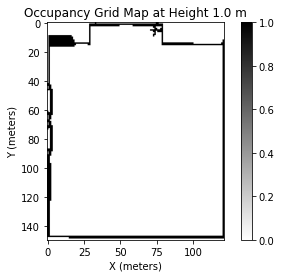

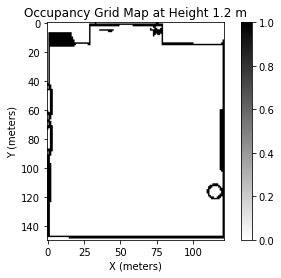

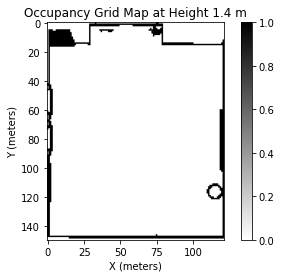

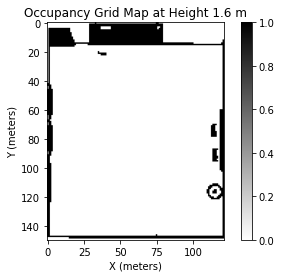

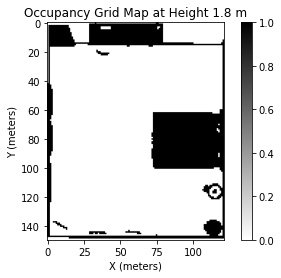

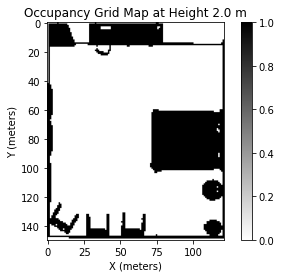

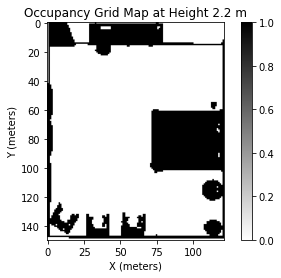

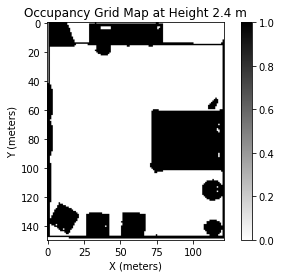

In [29]:
# Consider some heights list and create a OGM of the final_pointcloud using each height in the list
import matplotlib.pyplot as plt
def create_OGM(pointcloud, resolution=0.5, height=2.0, height2=1):
    # Calculate the extent of the point cloud
    min_point = np.min(np.asarray(pointcloud.points), axis=0)
    max_point = np.max(np.asarray(pointcloud.points), axis=0)

    x_min, x_max = min_point[0], max_point[0]
    y_min, y_max = min_point[2], max_point[2]

    num_x_cells = int((x_max - x_min) / resolution)
    num_y_cells = int((y_max - y_min) / resolution)

    occupancy_grid = np.zeros((num_y_cells, num_x_cells), dtype=np.uint8)

    for point in np.asarray(pointcloud.points):
        if point[1] >= height2 and point[1] <= height:
            x_idx = int((point[0] - x_min) / resolution)
            y_idx = int((point[2] - y_min) / resolution)

            if 0 <= x_idx < num_x_cells and 0 <= y_idx < num_y_cells:
                occupancy_grid[y_idx, x_idx] = 1

    return occupancy_grid

heights = []
for i in range(10,25,2):
    heights.append(i/10)

for height in heights:
    height2 = 0.1
    occupancy_grid = create_OGM(final_point_cloud, 0.05, height, height2)
    plt.imshow(occupancy_grid, cmap="binary")
    plt.title(f"Occupancy Grid Map at Height {height} m")
    plt.xlabel("X (meters)")
    plt.ylabel("Y (meters)")
    plt.colorbar()
    plt.show()

### (OPTIONAL) SECTION 3: Mapping using 3D LiDAR
This question is similar to section 2 but with LiDAR point cloud.

Your task is to fuse image data from a camera with the measurements from a LiDAR (a laser scanner with a 360° field-of-view that records distance measurements) and associate every point in the image with accurate distance measurements. 

The LiDAR’s frame is defined such that its X-axis points forward, its Y-axis points to the left, and its Z-axis points upwards. And the camera’s frame is defined such that its Z-axis points forward, X-axis points to the right, and Y-axis points downwards. The camera’s center is 8 cm below, 6 cm to the left, and 27 cm in front of the LiDAR’s center (found via extrinsic calibration and as measured by the LiDAR). Both the sensors are positioned such that the camera’s Z-axis and the LiDAR’s X-axis are perfectly parallel. Refer to the figure below for more details. 

<img src="misc/lidar.png" alt="drawing" width="500"/>

A LiDAR frame and its corresponding camera image have been provided as data/lidar-points.bin and data/image.png, respectively. The camera calibration matrix, K, is provided inside data/K.txt.

Code for loading the LiDAR points in Python is provided.

In [11]:
def load_velodyne_points(points_path):
    points = np.fromfile(points_path, dtype=np.float32).reshape(-1, 4)
    points = points[:,:3]                # exclude reflectance values, becomes [X Y Z]
    points = points[1::5,:]              # remove every 5th point for display speed (optional)
    points = points[(points[:,0] > 5)]   # remove all points behind image plane (approximate)
    return points

3.1 Compute the transformation (R, t) required to transform points in the LiDAR’s frame to the
camera’s frame. Give the transformation in both 
(a) homogeneous matrix form
(b) XYZ Euler angles (RPY)-translation form.

In [12]:
##############################################################################
# TODO: Do tasks described in 3.1
##############################################################################

# Replace "pass" statement with your code
pass

##############################################################################
# END OF YOUR CODE
##############################################################################

3.2 Then, using this computed transformation and the provided camera calibration matrix, project the LiDAR’s points onto the image plane. Use the color code (colormap) to correspond the depth of the points in the image (color is optional, but it helps in debugging). Use matplotlib or any equivalent library for plotting the points on the image. Visualize the image in this notebook. 

In [13]:
##############################################################################
# TODO: Do tasks described in 3.2
##############################################################################

# Replace "pass" statement with your code
pass

##############################################################################
# END OF YOUR CODE
##############################################################################